# Image recognition model for illustrations

### 00 Summary

The goal is to tag raster images (converted vector illustrations) 

Why not standard and well-known image recognition services? - they work with photos, not illustrations, illustration styles variy from author to author so the model has to be trained constantly

Python 3.5 | Windows 8

### 01 Ideas | to do list |  comments

#### Ideas
1) принципиальная проблема 1 – зачастую теги соответствуют не всей картинке, а одной из ее составной частей. Например, в случае, если на картинке изображен набор иконок. В этом случае для каждой субкартинки есть свой тег. Но нейросеть не знает какой именно субкартинке принадлежит этот тег, она считает его атрибутом целой картинки и таким образом учится не лучшим образом. Как можно улучшить предсказание для таких картинок?. Ререшние - 1) найти сет отдельных иконок с тагами и прогнать обучение на нем 2) разбить картинки данного сета на более мелкие части и проставить теги на каждую из них в ручную (большая трудоемкость) 3) научить модель опозновать картинки, состоящие из составных частей и прогонять распознование на каждой из них (общая идея)

2) принципиальная проблема 2 – что делать с тем, что картинки разного размера? Возможные решения - (1) обрезание (crop) (потеря информации, что негативно влияет на качество предсказания), (2) сжатие/растяжение (потеря информации + деформация, что может очень негаивно влиять на качество предсказания (3) создание из одной картинки нескольких, которые покрывают всю картинку (таких способов существует много), затем прогон модели на каждой из них, затем комбинирование предсказаний

3) принципиальная проблема 3 – результаты модели должны быть инвариантны относительно следующих изменений картинки: 1) поворот, отражение, 2) равномерный сдвиг всей картинки 3) перестановки составных независимых частей (например, если на картинке 2 объекта - машина и человек, их изображения раздельны и разнесены по разным частям картинки, то при их замене местами результат модели должен остаться прежним). 4) скарлирование составных независимых частей

Пункты теоретически спорные, т.к. некоторые понятия меняются в зависимости от положения объектов (например, приближаться, удаляться), принебрежем обучением таких концепций и сосредоточимся на том, чтобы не зависить в обучении от сдвигов/поворотов/перемешиваний. Это нужно затем, что авторы могут рисовать одни и те же элементы (например, машины) в разных местах изображения, разного размера, и модель должна понимать, что хоть элементы по-разному расположены и имеют разный рамер, они значат одно и то же

3.1) openCV - выделение особых точек, метод в принципе построен уже с учетом таковых требований. нейронные сети - в базовом варианте сети входной слой принимает положение (i,j) пикселя на картинке, поэтому простая нейронная сеть таким требованиям не соответствует. workarounds? Updated: сверточная нейронная сеть в некоторой степени может быть устойчива к некоторым трансляциям

4) тегирование – (1) распознование изображения - этап 1, самое сложеное (2) работа с тегами ((дополнение, порождение, синонимы и пр.), пример1, если есть теги "человек" и "доктор" -> создать тег "медицина", "здоровье, пример2 если есть тег Eiffel -> создать тег Eiffel tower, пример3 если есть тег "машина" -> добавить тег транспорт (категория), пример4 если есть тег "еда"-> добавить тег "пища" (синоним)) оставим на этап 2, как второстепенную задачу, при этом непременно очень важную и в высокой степени влияющую на качество

5) распознование слов на изображениях -> словарь принадлежности слов к темам/тегам -> порождение тегов.

6) SVG формат вполне читабелен в блокноте -> можно использовать для порождения новых векторных изображений на програмном уровне

7) стиль векторных иллюстраций очень изменчив - их сложно обучать

8) # построение матрицы частот взаимных встреч тегов

Other
кластеринг на графах (ребра с весами) -> иерархическое древо

Matrix dimensional reduction?

вектор -> растр -> вектор для сравнения качества векторизации (SVG)

ME TO DO 1 - reccommendation sustem on tags recommendtation for authors when they input, what they've drawn
and more tag analysis
A/B experimetn - 2 pretty sililar (or completely similar pics) with author's only tags and with recommended tags


выделение составных частей изображения (по разным границам)
hidden latent layers?
общий дизайн улучшения

дополнить задачу следующим этапом - рекомендация по самым искомым/популярным тегам

выделение кусков из векторов?

bag of images?

подход с точки зрения не распознавания изображений, а связных словарей,
которые затем пойдут в рекомендации авторам
сначала изучить задачу помощи в рекоммендациям авторам

#### To do list

1.0) предобработка данных

1.1) сопоставить файл тегов и картинки (join), устранить дубликаты

2) сделать корректную кросс-валидацию для обучения. Идея в том, чтобы теги были равномерно распределены по train/test сетам

3) cделать метрику качества полученной модели

4) выбор и тренинг на нескольких моделях

5.1) CNN

5.1.1) Техническая подзадача 1 – использование GPU для ускорения вычислений (openCL (на Radeon) / cuda for faster training)

5.1.2)  Техническая подзадача 2 – to minimize the size of vectorized image representation for learning. Now numpy.array takes 10x more space in RAM compared to image size on HDD. Possible options – to minimize the size of the array by adding dtype or somehow else. another representation?

5.1.3) Техническая подзадача 3 – размер сети. Для картинки 1024x1024 в данный момент memory error. workarounds? Dimensional reduction (probably won't work), image rescaling (probalby ok, but quality reduction), anything else?

5.2) OpenCV

5.2.1) выбор типа и оптимальное выделение особых точек

5.2.2) кластеринг/группировка

5.2.3) classification

5.3) look for other methods

6) do the [quality of the model] to [number of items in train set] to check the learning curve 


other_1) изображения с иконками (1) - вычислить их количество, (2) оценить трудоемкость в человекочасах по разрезанию и тегированию составных частей



### 02 Imports

In [1]:
# not all used
import lasagne
from theano import tensor as T
from lasagne.nonlinearities import *
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from IPython.display import Image, HTML
from IPython.display import clear_output
import pylab
import glob, os
from PIL import Image
import theano
# import keras
import random
import itertools
import collections
import re

# pandas display options
pd.options.display.max_columns = 100 #def100
pd.options.display.max_colwidth = 100 #def100
pd.options.display.max_rows = 100 #def 100

%matplotlib inline  

In [2]:
import cv2
cv2.ocl.setUseOpenCL(False)
# http://stackoverflow.com/questions/33639272/opencv-3-python-feature-detection-error-on-function-cv2-detectandcompute-and-als
from cv2 import ORB_create
from cv2 import drawKeypoints
from cv2 import BFMatcher
from cv2 import NORM_HAMMING
# from cv2 import orb.detectAndCompute
from cv2 import imread

### 03 Ways to inputs

In [3]:
#  change this according to your working directories

way = "G:\!datascience\!image_class\Image_class_01" # working directory
way_pics = "G:\!google_drive\pics+keywords (1)\pic" # directory with pictures
tag_file = "G:\!google_drive\pics+keywords (1)\sample01.txt" # file with tags

In [4]:
# example pic
# pic1 = "1309.i001.001.S.m001.c18.Arabic Royal Pattern.jpg"

### 04 Functions (preprocessing)

In [5]:
def get_file_names_of_pics(way = way_pics,
                           pics_available_types = ['.jpg','.JPG']):
# getting file names of pics
# just by getting names of all files in the dirrectory
# and filtering them by extension
    os.chdir(way_pics)
    pics = [] 
    for file in glob.glob("*"):
        pics.append(file)
    pics = [pic for pic in pics if pic[-4:] in pics_available_types]
#     os.chdir(way)
#     print(len(pics))
#     pics[:10]
    return(pics)

# pics_types = set([i[-4:] for i in pics])
# pics_types

In [6]:
def get_pics_sizes(pics):
    pics_sizes = []
    for pic in pics:
    # implement parallel computing for speed boost?
    # this takes much time
#         if pic[-4:].lower() == '.jpg':
        im=Image.open(way_pics + "\\" + pic)
        pics_sizes.append(im.size) # (width,height) tuple
    return(pics_sizes)

In [7]:
def plot_pics_sizes_distribution(pics_sizes):
    #plotting Node vs friends age distribution
    x = [i[0] for i in pics_sizes] #width
    y = [i[1] for i in pics_sizes] #height
    ax = plt.subplot(111)
    plt.scatter(x, y, alpha = 0.03,) 
    ax.set_title('Image resolution distribution')
    ax.set_xlabel('width')
    ax.set_ylabel('height')
    # pylab.savefig("age_distr1", bbox_inches='tight')
    plt.show()
# plot_pics_sizes_distribution()

In [8]:
def calc_share_of_imgs_based_on_resolution(pics_sizes, height = 1024, width = 1024):
    return(sum([((i[0] == width) and (i[1] == height)) for i in pics_sizes])/len(pics_sizes))

In [9]:
def read_tag_file(tag_file = tag_file):
    # read the tag file and put it into a list form
    # also form a tags_bag - a list with all tags to analyse it

    # it runs too long, maybe parallel computing?

    tags=[]
    with open(tag_file, 'r') as f:
        for line in f:
            tags.append(line.replace('\n',''))
    tags = [item.split('\t') for item in tags] 
    tags = [[item[0], [i for i in item[1].split(';')]] for item in tags]
    tags = [i for i in tags if i[1] != ['']] # remove all tags with no description
    tags_bag = [item[1] for item in tags]
    tags_bag = [item for sublist in tags_bag for item in sublist]
#     tags_bag[:5]
    return(tags, tags_bag)

In [10]:
def clean_and_merge(pics, pics_sizes, tags):
    # removing duplicate tags
    # as of now there can be no duplicate pics since the OS prohibits duplicate names
    # removing pics with no corresponding tags
    # matching remaining pics with corresponding tags
    tags_df = pd.DataFrame(data = tags,columns = ['pic','tag']).drop_duplicates(subset = 'pic', keep='first')
    pics_df = pd.DataFrame(data = {'pic':pics,'pic_size':pics_sizes}).merge(tags_df, on='pic', how='left').dropna()
#     pics_df.columns = ['pic', 'tags']
    return pics_df

In [11]:
# def save_and_load(pics_df):
#     os.path.isfile(way + '\\' + 'pics_df') == True
#     pics_df.to_csv(path_or_buf = way + '\\' + 'pics_df', index = False)
#     pics_df =  pd.read_csv(way + '\\' + 'pics_df', encoding = 'windows-1250')

In [92]:
def str_to_lst(lst):
    junkers = re.compile("[[' \]]")
    result = junkers.sub('', lst).split(',')
    return(result)

In [13]:
def load_inputs(way = way):
    if os.path.isfile(way + '\\' + 'pics_df') == True:
        pics_df =  pd.read_csv(way + '\\' + 'pics_df', encoding = 'windows-1250')
    else:
        pics = get_file_names_of_pics()
        pics_sizes = get_pics_sizes(pics = pics) #that's very long
        tags, tags_bag = read_tag_file()
#         tags_names = [item[0] for item in tags]
#         tags_tags = [item[1] for item in tags]
        pics_df = clean_and_merge(pics = pics, tags = tags, pics_sizes = pics_sizes)
        pics_df.ix[0:,'tag'] = pd.DataFrame(pics_df.ix[0:,'tag']).apply(lambda row: str_to_lst(row['tag']), axis = 1)
        pics_df.to_csv(path_or_buf = way + '\\' + 'pics_df', index = False)
    return pics_df

In [14]:
def pic_open(pic, way_pics):
    img = Image.open(way_pics + "\\" + pic).convert('RGB') # sometimes there is CMYK
    img = img.resize((128,128),Image.ANTIALIAS)
    img = np.reshape(img, (3,128,128))
    return img

def find_bad_pics(df,way_pics = way_pics):
    err_arr = []
    for pic in df:
        try:
            pic_open(pic, way_pics = way_pics)
        except:
            err_arr.append(pic)
#             print(pic)
    return err_arr

def do_find_bad_pics(df, way):
    err_arr = find_bad_pics(df)
    pd.DataFrame(err_arr).to_csv(path_or_buf = way + '\\' + 'err_pic_df', encoding = 'windows-1250', index = False)
    err_pic_df =  pd.read_csv(way + '\\' + 'err_pic_df', encoding = 'windows-1250')
    return list(err_pic_df['0'].values)

# to write function
# for i in err_pic_df:
#     pics_df = pics_df.drop(pics_df[pics_df['pic'] == i].index)

### 05 Reading inputs

In [15]:
# step 1 - scan a pics directory and a tag file to get all info into a single dataframe
# takes ~ 10 min at first run (scanning 2.4 GB from drive)
# then saves results to a separate file to start faster on the next launch of the notebook
pics_df = load_inputs(way=way)

In [16]:
# number of all pictures
pics_df.shape[0]

24282

In [17]:
pics_df[:2]

,pic,pic_size,tag
0,1309.i001.001.S.m001.c18.Arabic Royal Pattern.jpg,"(1024, 890)","['royal pattern', 'arabic pattern', 'flower', 'background', 'design', 'islam', 'motif', 'decorat..."
1,1309.i001.001.S.m001.c18.Black Floral Arabic Pattern -var_131121.jpg,"(1024, 890)","['wedding', 'decoration', 'filigree', 'design', 'vintage', 'old', 'arabesque', 'art', 'set', 'me..."


In [18]:
# (code not optimized atm, later this step could be removed)
# this is another scan to find some pics with errors in names due to the encoding
# 15 more minutes to run
err_pic_df = find_bad_pics(df = list(pics_df['pic'].values))

In [19]:
# drop that bad pics
for i in err_pic_df:
    pics_df = pics_df.drop(pics_df[pics_df['pic'] == i].index)

In [20]:
tags, tags_bag = read_tag_file()

### 06 Data exploration

In [21]:
# 1) let's look at the tag distribution

unique, counts = np.unique(tags_bag, return_counts=True)
freq = np.asarray((unique, counts)).T 

freq = pd.DataFrame(freq, columns=['tag','frequency'])
freq['frequency'] = freq['frequency'].astype(np.int64)

freq = freq.sort_values(by='frequency', ascending=False).reset_index(drop = True)
# freq['frequency'].hist(bins = 1000)

In [22]:
freq[:20]

,tag,frequency
0,vector,24387
1,illustration,24355
2,design,22309
3,set,17983
4,collection,14665
5,business,13893
6,isolated,13868
7,decorative,13668
8,symbol,13093
9,elements,11917


In [23]:
# distribution of frequencies of tags:
# median = 6 occurrences in a dataset (is that enough to train a model?)
# 25% of tags have 2 or less occurrences (that's definetely not enough)
# so 25% of tags can't be predicted because of the lack of data
# but 25% of tags have at least 27 occurrences (that's probably quite enough)#\
# so the model quite probably could be traind to distinguish them

# 15,306 unique tags

freq.describe()

,frequency
count,15306.000000
mean,77.246047
std,564.671657
min,1.000000
25%,2.000000
50%,6.000000
75%,27.000000
max,24387.000000


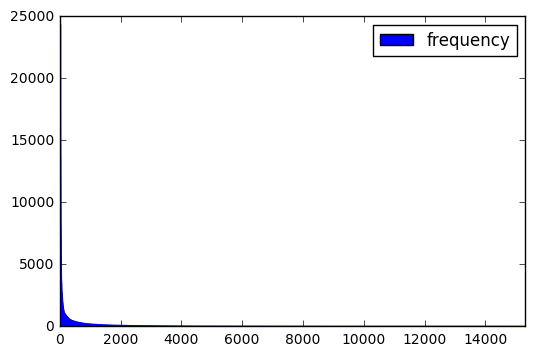

In [24]:
# distribution of tags' frequencies for all tags
freq.plot(kind = 'area')

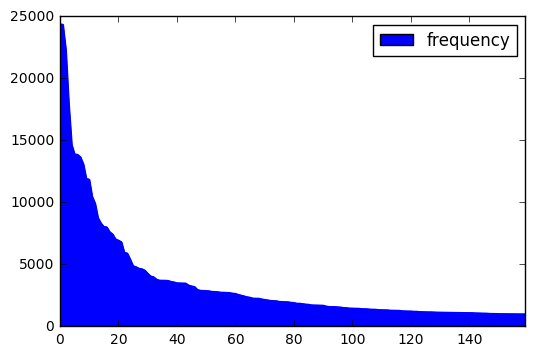

In [25]:
# distribution of tags' frequencies for tags with >1000 occurrences
freq[freq['frequency']>1000].plot(kind = 'area')

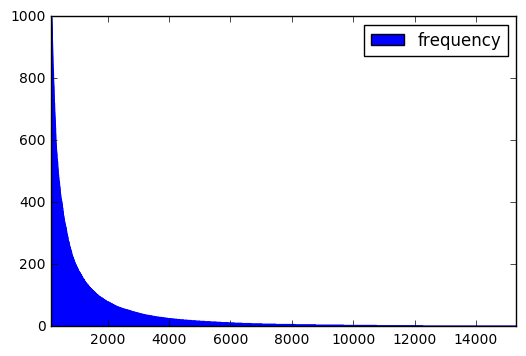

In [26]:
# distribution of tags' frequencies for tags with <1000 occurrences
freq[freq['frequency']<=1000].plot(kind = 'area')

In [27]:
# если какой-то таг присутствует 1 раз, (можно обобщить, как менее X раз)
# то его нельзя научиться распозновать
# можно только "работать с текстом" - считать, с какими комбинациями текста этот тег встречается,
# и затем добавлять его в прогнозы на такой основе
# оставим эту задачу на 2-ой этап. сначала - распознование изображений
len(freq[freq['frequency']==1])

3057

In [28]:
# plot_pics_sizes_distribution(pics_sizes = pics_df['pic_size'])

In [29]:
calc_share_of_imgs_based_on_resolution(height = 1024, width = 1024, pics_sizes = pics_df['pic_size'])
# 82% of all pictures has the same resolution (82%) (squared 1024 x 1024)
# at first let's train algo on them and
# at second - think of how to manage with others (resizing, cropping etc.)

0.0

### 06 Convolutional Neural Network (CNN)

In [30]:
pics_df = pics_df[pics_df['pic_size'] == '(1024, 1024)'].reset_index(drop = True)
# let's concentrate on squared images

In [31]:
#number of squarred picutres
pics_df.shape[0]

20189

In [32]:
pics_df[:2]

,pic,pic_size,tag
0,1309.i001.002.S.m001.c17.Black Cat with Green Eyes.jpg,"(1024, 1024)","['cat', 'black', 'pets', 'drawing', 'green', 'eyes', 'line', 'icon', 'tail', 'cartoon', 'white b..."
1,1309.i001.003.S.m001.c17.Blue Moon.jpg,"(1024, 1024)","['moon', 'crescent', 'blue moon', 'decoration', 'bedtime', 'magic', 'night', 'celebration', 'xma..."


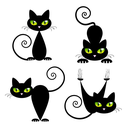

In [33]:
# let's look at the image example
img = Image.open(way_pics + "\\" + pics_df.ix[0,'pic'])
img = img.resize((128,128),Image.ANTIALIAS)
img

In [34]:
# that's how the input data would look like
img = pic_open(way_pics = way_pics, pic = pics_df.ix[0,'pic'])
img

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ..., 
        [  0,   0,   0, ..., 255, 255, 255],
        [255, 255, 255, ...,   0,   4,   4],
        [  4,   0,   0, ...,   0,   0,   2]],

       [[  2,   2,   4, ..., 255, 255, 255],
        [255, 255, 255, ...,   0,   2,   2],
        [  2,   0,   0, ...,   0,   0,   1],
        ..., 
        [255, 255, 255, ..., 254, 254, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ...,  37,  78,  78]],

       [[ 78, 157, 157, ..., 251, 251, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ...,   0,   0,   0],
        ..., 
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

In [35]:
# current build - 128x128 pix and 3 colors pics, 2 convolution layers, prediction of a single tag

In [36]:
y_target = pics_df['tag'].astype(str).str.contains('people')*1

In [37]:
# Making the train and the test dataset 

# target - binary variable
# which contains a selected tag
# 'pictogram' for example
y_target = pics_df['tag'].astype(str).str.contains('car')*1


y = y_target # all targets
X = pics_df['pic'].values # all pics

# X_train = X[0:20]
# X_val = X[20:40]
# y_train = y[0:20]
# y_val = y[20:40]

# X_train = X[0:300]
# X_val = X[300:400]
# y_train = y[0:300]
# y_val = y[300:400]

# X_train = X[0:100]
# X_val = X[100:200]
# y_train = y[0:100]
# y_val = y[100:200]

# X_train = X[0:1200]
# X_val = X[1200:1800]
# y_train = y[0:1200]
# y_val = y[1200:1800]

# X_train = X[0:10000]
# X_val = X[10000:11000]
# y_train = y[0:10000]
# y_val = y[10000:11000]

X_train = X[0:5000]
X_val = X[5000:6000]
y_train = y[0:5000]
y_val = y[5000:6000]

# X_train = X[1300:1400]
# X_val = X[1300:1400]
# y_train = y[1400:1500]
# y_val = y[1400:1500]

In [38]:
# to check how the train/test split is balanced
# there is an option to implement an automatic balanced split via scikit-learn

print(sum(y.values) / len(y), 'positive rate in the whole dataset')
print(sum(y_val.values) / len(y_val), 'positive rate in the test dataset')
print(sum(y_train.values) / len(y_train), 'positive rate in the train dataset')

0.35667937986 positive rate in the whole dataset
0.37 positive rate in the test dataset
0.3082 positive rate in the train dataset


In [39]:
# inputs for CNN

input_X = T.tensor4("X")
target_y = T.vector("target Y integer",dtype='int32')

In [40]:
# CNN Code
    
input_layer = lasagne.layers.InputLayer(shape=(None,1,200,200), input_var=input_X)
conv_1 = lasagne.layers.Conv2DLayer(input_layer, 64, (3, 3),
                                    nonlinearity=leaky_rectify, name="conv_1")
conv_2 = lasagne.layers.Conv2DLayer(conv_1, 32, (3, 3),
                                    nonlinearity=leaky_rectify, name="conv_2")
pool = lasagne.layers.Pool2DLayer(conv_2, (3, 3), stride=2, mode='max', name="pool")
dense = lasagne.layers.DenseLayer(lasagne.layers.dropout(pool, 0.5),
                                    128, nonlinearity=leaky_rectify,
                                    W=lasagne.init.Orthogonal(), name="dense")
dense_output = lasagne.layers.DenseLayer(lasagne.layers.dropout(dense, 0.5),
                                    2, nonlinearity=softmax, name="output")

In [41]:
#предсказание нейронки (theano-преобразование)
y_predicted = lasagne.layers.get_output(dense_output)

In [42]:
#все веса нейронки (shared-переменные)
all_weights = lasagne.layers.get_all_params(dense_output)
print(all_weights)

[conv_1.W, conv_1.b, conv_2.W, conv_2.b, dense.W, dense.b, output.W, output.b]


In [43]:
#функция ошибки - средняя кроссэнтропия
loss = lasagne.objectives.categorical_crossentropy(y_predicted,target_y).mean()

# точность, чтобы трекать и ее в том числе
accuracy = lasagne.objectives.categorical_accuracy(y_predicted,target_y).mean()

#сразу посчитать словарь обновлённых значений с шагом по градиенту, как раньше
updates_sgd = lasagne.updates.rmsprop(loss, all_weights,learning_rate=0.00001)

In [44]:
#функция, которая обучает сеть на 1 шаг и возвращащет значение функции потерь и точности
train_fun = theano.function([input_X,target_y],[loss,accuracy],updates= updates_sgd)

#функция, которая считает точность
accuracy_fun = theano.function([input_X,target_y],accuracy)

In [45]:
# prediction funciton with the trained network
predict_function = theano.function([input_X], y_predicted)

In [46]:
def batch_return(pics_names_set,way_pics=way_pics, prepoc_type = 'default'):
    if prepoc_type == 'default':
        # support funciton for iterate_minibatches function
        # gets array of pic names
        # returns array of inputs for CNN
        # reads number of images with known names
        # resizes them (if needed)
        # converts shape as needed
        batch_return_data = []
        for i in pics_names_set:
            img = Image.open(way_pics + "\\" + i).convert('RGB') # sometimes there is CMYK
            img = img.resize((128,128),Image.ANTIALIAS)
            img = np.reshape(img, (3,128,128))
    #         if len(batch_return_data)!=0:
    #         print(i)
            batch_return_data.append(img)

    #         else:
    #             batch_return_data = np.array(img)
        return np.array(batch_return_data)
    if prepoc_type == 'borders':
        thresh_canny = 15
        batch_return_data = []
        for i in pics_names_set:
            img = Image.open(way_pics + "\\" + i).convert('RGB') # sometimes there is CMYK
            img = img.resize((200,200),Image.ANTIALIAS)
            img = cv2.cvtColor(np.array(img),cv2.COLOR_BGR2GRAY)
            img = cv2.blur(img,(3,3))
            img = cv2.Canny(img, thresh_canny, thresh_canny*3, 3)
            img = np.reshape(img, (1,200,200))
            batch_return_data.append(img)
        return np.array(batch_return_data)
    else:
        raise error

In [47]:
# вспомогательная функция, которая возвращает список мини-батчей для обучения нейронки

#на вход
# inputs - тензор из картинок размером (много, 1, 28, 28), например - X_train
# targets - вектор из чиселок - ответов для каждой картинки из X; например - Y_train
# batchsize - одно число - желаемый размер группы

#что нужно сделать
# 1) перемешать данные
# - важно перемешать targets и targets одним и тем же образом, чтобы сохранить соответствие картинки ответу на неё
# 3) побить данные на подгруппы так, чтобы в каждой подгруппе было batchsize картинок и ответов
# - если число картинок не делится на batchsize, одну подгруппу можно вернуть другого размера
def iterate_minibatches(inputs, targets, batchsize, shuffle=False, prepoc_type = 'default'):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield batch_return(pics_names_set = inputs[excerpt],
                          prepoc_type = prepoc_type), targets[excerpt] # pics

In [48]:
# # CNN training cycle
# # may take much time (hours/days depending on parameters)

# # prepoc_type = 'default'


# import time

# num_epochs = 100 #количество проходов по данным

# batch_size = 50 #размер мини-батча

# for epoch in range(num_epochs):
#     # In each epoch, we do a full pass over the training data:
#     train_err = 0
#     train_acc = 0
#     train_batches = 0
#     start_time = time.time()
#     for batch in iterate_minibatches(X_train, y_train,batch_size, prepoc_type = 'borders'):
#         inputs, targets = batch
#         train_err_batch, train_acc_batch= train_fun(inputs, targets)
#         train_err += train_err_batch
#         train_acc += train_acc_batch
#         train_batches += 1

#     # And a full pass over the validation data:
#     val_acc = 0
#     val_batches = 0
#     for batch in iterate_minibatches(X_val, y_val, batch_size):
#         inputs, targets = batch
#         val_acc += accuracy_fun(inputs, targets)
#         val_batches += 1

    
#     # Then we print the results for this epoch:
#     print("Epoch {} of {} took {:.3f}s".format(
#         epoch + 1, num_epochs, time.time() - start_time))

#     print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
#     print("  train accuracy:\t\t{:.2f} %".format(
#         train_acc / train_batches * 100))
#     print("  validation accuracy:\t\t{:.2f} %".format(
#         val_acc / val_batches * 100))

In [49]:
# some code for checking the prediciton on the new data

i = 261 # item id
print(X[i]) # item
print(y[i]) # actual target of the item

# input for the CNN
img = Image.open(way_pics + "\\" + X[i])
img = img.resize((128,128),Image.ANTIALIAS)
img = np.reshape(img, (3,128,128))
Z = np.array([img]) 

predict_function(Z) # prediction of the CNN

1311.i010.008.S.m001.c10.christmas invitation.jpg
1


ValueError: The hardcoded shape for the image stack size (1) isn't the run time shape (3).
Apply node that caused the error: ConvOp{('imshp', (1, 200, 200)),('kshp', (3, 3)),('nkern', 64),('bsize', None),('dx', 1),('dy', 1),('out_mode', 'valid'),('unroll_batch', None),('unroll_kern', None),('unroll_patch', True),('imshp_logical', (1, 200, 200)),('kshp_logical', (3, 3)),('kshp_logical_top_aligned', True)}(X, conv_1.W)
Toposort index: 5
Inputs types: [TensorType(float64, 4D), TensorType(float64, (False, True, False, False))]
Inputs shapes: [(1, 3, 128, 128), (64, 1, 3, 3)]
Inputs strides: [(393216, 131072, 1024, 8), (72, 72, 24, 8)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[Elemwise{Composite{((i0 * (i1 + i2)) + (i3 * Abs((i1 + i2))))}}[(0, 1)](TensorConstant{(1, 1, 1, ..) of 0.505}, ConvOp{('imshp', (1, 200, 200)),('kshp', (3, 3)),('nkern', 64),('bsize', None),('dx', 1),('dy', 1),('out_mode', 'valid'),('unroll_batch', None),('unroll_kern', None),('unroll_patch', True),('imshp_logical', (1, 200, 200)),('kshp_logical', (3, 3)),('kshp_logical_top_aligned', True)}.0, InplaceDimShuffle{x,0,x,x}.0, TensorConstant{(1, 1, 1, ..) of 0.495})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "C:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-251198cc175e>", line 2, in <module>
    y_predicted = lasagne.layers.get_output(dense_output)
  File "C:\Anaconda3\lib\site-packages\lasagne\layers\helper.py", line 191, in get_output
    all_outputs[layer] = layer.get_output_for(layer_inputs, **kwargs)
  File "C:\Anaconda3\lib\site-packages\lasagne\layers\conv.py", line 330, in get_output_for
    conved = self.convolve(input, **kwargs)
  File "C:\Anaconda3\lib\site-packages\lasagne\layers\conv.py", line 608, in convolve
    filter_flip=self.flip_filters)

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [50]:
help(conv_1.W)

Help on TensorSharedVariable in module theano.tensor.sharedvar object:

class TensorSharedVariable(theano.tensor.var._tensor_py_operators, theano.compile.sharedvalue.SharedVariable)
 |  Variable that is (defaults to being) shared between functions that
 |  it appears in.
 |  
 |  Parameters
 |  ----------
 |  name : str
 |      The name for this variable (see `Variable`).
 |  type : str
 |      The type for this variable (see `Variable`).
 |  value
 |      A value to associate with this variable (a new container will be
 |      created).
 |  strict
 |      True : assignments to .value will not be cast or copied, so they must
 |      have the correct type.
 |  allow_downcast
 |      Only applies if `strict` is False.
 |      True : allow assigned value to lose precision when cast during
 |      assignment.
 |      False : never allow precision loss.
 |      None : only allow downcasting of a Python float to a scalar floatX.
 |  container
 |      The container to use for this variable. I

In [51]:
np.array(conv_1.W)

array(conv_1.W, dtype=object)

In [52]:
print(conv_1.W)

conv_1.W


In [53]:
freq[100:200]

,tag,frequency
100,sport,1469
101,green,1456
102,home,1456
103,isometric,1427
104,time,1418
105,water,1413
106,human,1388
107,car,1380
108,holiday,1374
109,color,1342


In [54]:
def img_preproc(img_name):
    thresh_canny = 15
    im = Image.open(way_pics + "\\" + img_name).convert('RGB') # sometimes there is CMYK
    im = im.resize((1024,1024),Image.ANTIALIAS)
    # im = cv2.imread(way_pics + "\\" + pic4)
    im = cv2.cvtColor(np.array(im),cv2.COLOR_BGR2GRAY)
    im = cv2.blur(im,(3,3))
    im = cv2.Canny(im, thresh_canny, thresh_canny*3, 3)
    return im

In [55]:
pic1 = "1309.i001.001.S.m001.c18.Arabic Royal Pattern.jpg"
pic2 = "1310.i003.017.S.i003.c10.car gift.jpg"
pic3 = "1310.i003.004.S.m001.c7.home security.jpg"
pic4 = "1310.i003.002.S.m001.c7.home safety.jpg"
pic5 = "1310.i003.006.S.m002.c7.Beach summer vacation.jpg"
pic6 = "1310.i003.005.P.m002.c20.Lounge chairs.jpg"

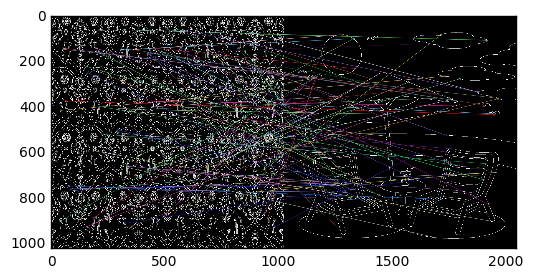

(<matplotlib.image.AxesImage at 0x20da868898>, None)

In [56]:
img1 = img_preproc(pic1)
img2 = img_preproc(pic6)

# Initiate SIFT detector
orb = cv2.ORB_create(nfeatures=100000, scoreType=cv2.ORB_FAST_SCORE)

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:100], outImg = (0,255,0), flags=2)

plt.imshow(img3),plt.show()

18


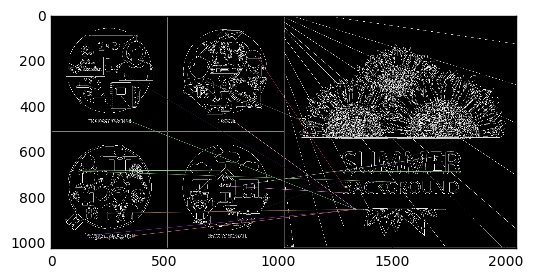

(<matplotlib.image.AxesImage at 0x20da74f630>, None)

In [57]:
img1 = img_preproc(random.choice(pics_df['pic'].values))
img2 = img_preproc(random.choice(pics_df['pic'].values))

# Initiate SIFT detector
# sift = cv2.SIFT()
# http://stackoverflow.com/questions/26855753/pythonopencv-3-cant-use-sift
sift = cv2.xfeatures2d.SIFT_create(nfeatures=10000) 


# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, outImg = (0,255,0), flags=2)

print(len(good))

plt.imshow(img3),plt.show()

In [58]:
len(matches)

2333

In [59]:
import random

print(random.choice(pics_df['pic'].values))

1411.i020.026.S.m003.c11.cup tea.jpg


In [60]:
pics_df.ix[1:2,'tag']

1    ['moon', 'crescent', 'blue moon', 'decoration', 'bedtime', 'magic', 'night', 'celebration', 'xma...
2    ['lace', 'pattern', 'vector', 'background', 'illustration', 'vintage', 'floral', 'flower', 'seam...
Name: tag, dtype: object

In [61]:
(pics_df.ix[1:2,'tag'].stack(),pics_df.ix[3:4,'tag'].stack())

AttributeError: 'Series' object has no attribute 'stack'

In [ ]:
s = pics_df.ix[1:10,'tag']
pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

In [ ]:
pics_df.ix[1:2,'tag']

In [ ]:
s = pics_df.ix[:,'tag']
pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)

In [ ]:
pd.get_dummies(pics_df.ix[1:2,'tag'], prefix=['col1', 'col2'])

In [ ]:
pics_df.ix[1,'tag']

In [62]:
from scipy.sparse import csr_matrix

In [71]:
len(unique)

15306

In [72]:
from scipy.sparse import *

In [78]:
S[0,1]

0

In [114]:
# pics/tags dummies matrix for pics_df
# realization via sparce matrix since pandas get dummies provide memory error
# matrix rows = pics, columns = tags (their indices)
# tags-indices matching performed via unique_dic

# save and load sparce matrix
def save_sparse_csr(filename,array):
    np.savez(filename,data = array.data ,indices=array.indices,
             indptr =array.indptr, shape=array.shape )
    
def load_sparse_csr(filename):
    loader = np.load(filename)
    return csr_matrix((  loader['data'], loader['indices'], loader['indptr']),
                         shape = loader['shape'])

# producing this space matrix 
def sparce_tag(pics_df=pics_df, unique= unique):
    
    # getting all unique tags to be the width of the matrix
    # to match tags and their indices (column position)
    unique_dic = {}
    for i in range(len(unique)):
        unique_dic[unique[i]]=i
    
    # initialize matrix
    S = dok_matrix((len(pics_df), len(unique)), dtype=np.int8)
    for ind in range(len(pics_df)):
    #     if ind % 500 == 0: # to check how long it works
    #         print(ind)
        for tag in pics_df.ix[ind,'tag']:
            if tag in unique: # sometimes tag is not in unique due to the preprocessing methods.
                # in a better scenario this should be fixed
    #             print(unique_dic[tag]) # to check how it works
                S[ind,unique_dic[tag]] = 1
            else:
                pass
    #             print('not_in_unique')
    S = S.tocsr()
    save_sparse_csr(way + "\\" + 'sparce',S)
    S = load_sparse_csr(way + "\\" + 'sparce'+ '.npz')
    return(S)

In [127]:
unique[1000]

'assorted'

In [128]:
unique_dic[unique[1000]]

1000

In [131]:
len(pics_df)

20189

In [133]:
S_dense = pd.DataFrame(data = S_dense, columns = unique)

In [132]:
# statistics to gather
# 1) absolute frequency of each tag
# 2) matrix of absolute frequencies of pairs of tags
# 3) matrix of relative frequencies of pairs of tags. how? p(A|B) = P(B|A)*P(A)/P(B) - the matrix would be asymmetric
# 3) this would be matrix of P(A|B), A- row, B - column, A,B - tags
# 1-3 shoud be constructed on a CV basis - train matrix and test - to calculate prediction accuracy

In [117]:
S_dense

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [116]:
S_dense = S.todense()

In [140]:
rows = np.random.choice(S_dense.index, 4000)
S_dense_test = S_dense.ix[rows]
S_dense_train = S_dense.drop(rows)

In [158]:
# frequencies of pair occurrences
TF = dok_matrix((len(unique), len(unique)), dtype=np.int32)

In [162]:
for i in range(len(S_dense_train.columns)):
    for j in range(len(S_dense_train.columns)):
        if i % 100 == 0 and j % 100 == 0:
            print(i,j)
        TF[i,j] = sum(S_dense_train.apply(lambda row: (row[S_dense_train.columns[i]]*row[S_dense_train.columns[j]]), axis=1))
    

0 0
0 100
0 200
0 300
0 400


KeyboardInterrupt: 

In [155]:
print('1','2')

1 2


In [154]:
S_dense_train.shape

(16571, 15306)

In [152]:
i = 14571
j = 7051
sum(S_dense_train.apply(lambda row: (row[S_dense_train.columns[i]]*row[S_dense_train.columns[j]]), axis=1))

16261

In [150]:
unique_dic['vector']

14571

In [151]:
unique_dic['illustration']

7051

In [147]:
freq

,tag,frequency
0,vector,24387
1,illustration,24355
2,design,22309
3,set,17983
4,collection,14665
5,business,13893
6,isolated,13868
7,decorative,13668
8,symbol,13093
9,elements,11917
